In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("train.csv")

In [53]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,missing,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,missing,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,missing,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,missing,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,missing,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Cabin']=df['Cabin'].fillna('missing')
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
#df.head(50)
#df.groupby(by=["Cabin"]).sum()

In [7]:
def onehotencoding(dataf,X):
    dummy=pd.get_dummies(dataf[X])
    df0=pd.concat([dataf,dummy],axis=1)
    df0=df0.drop([X,dummy.columns[0]],axis=1)
    return df0

In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])


In [9]:
df1=onehotencoding(df, 'Cabin')
df1=onehotencoding(df1,'Embarked')
df1=onehotencoding(df1,'Ticket')
df1=df1.drop(['Name', 'PassengerId'], axis=1)


In [10]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,A14,A16,A19,...,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X=df1.drop(['Survived'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.03352008,
        -0.03352008, -0.0474312 ],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.03352008,
        -0.03352008, -0.0474312 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.03352008,
        -0.03352008, -0.0474312 ],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.03352008,
        -0.03352008, -0.0474312 ],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.03352008,
        -0.03352008, -0.0474312 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.03352008,
        -0.03352008, -0.0474312 ]])

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=600, svd_solver= 'full')
pca = PCA(n_components=600).fit(X)
print(pca.explained_variance_ratio_.sum( axis=0))
Principal_components=pca.transform(X)
pca_df = pd.DataFrame(data = Principal_components)
pca_df.head(5)

0.8783201555661224


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,-1.589391,0.097667,-0.747898,0.423271,0.242791,0.108019,-0.053186,-0.344853,0.068892,0.015367,...,6.429938e-01,9.681290e-01,5.192888e-01,2.040749e+00,5.316316e-01,-1.731417e-01,-1.569906e+00,7.748007e-01,-2.189965,2.651882e+00
1,3.929186,-0.280559,2.892720,-2.992699,-1.293035,0.068359,-2.067041,-4.828067,1.066169,0.041775,...,7.979728e-16,2.291049e-14,-4.883160e-14,-5.412337e-16,9.427919e-14,5.313492e-14,3.434458e-08,-6.677701e-07,-0.000002,3.000061e-07
2,-1.189004,0.135185,-0.249891,-0.745628,-0.498411,0.982821,-0.147830,0.012748,-0.053871,0.003154,...,-1.150330e+00,4.376790e-02,-2.341072e-01,-9.111724e-01,4.844984e+00,-2.942390e+00,1.597438e+00,-2.907727e+00,0.421294,-2.541311e+00
3,3.123290,-0.520430,-1.734385,-2.039315,-0.485256,-0.512641,2.367202,-4.148239,-0.090839,0.299514,...,-1.184886e-13,2.897682e-14,1.944217e-13,1.782827e-13,-2.357537e-13,-2.001937e-13,-1.342829e-07,1.221449e-05,0.000025,2.277727e-07
4,-1.358041,-0.859914,-0.722573,0.556618,-0.169297,0.313456,-0.152878,0.079076,0.031583,-0.008108,...,-7.027837e-01,4.898956e-01,1.010036e+00,1.297732e+00,1.302832e+00,2.387843e+00,8.129910e-01,1.971154e-01,-0.524139,-6.183736e-01


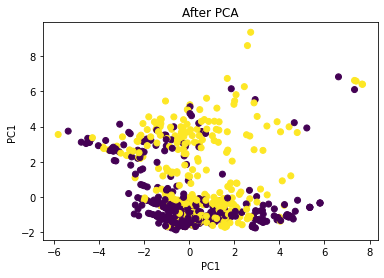

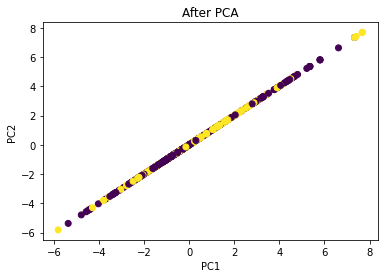

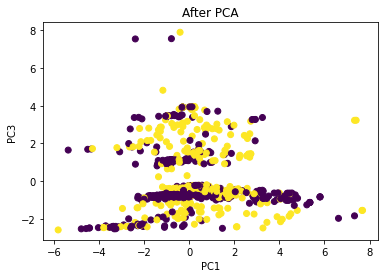

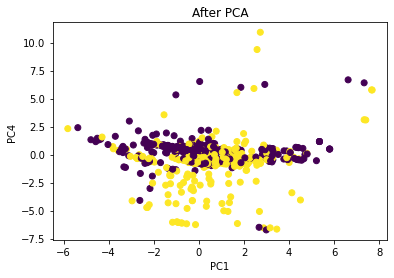

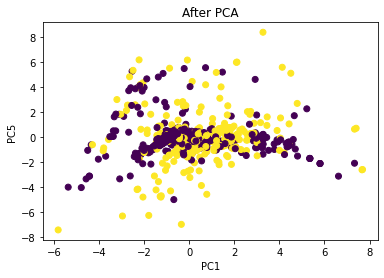

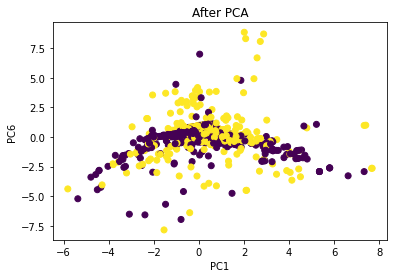

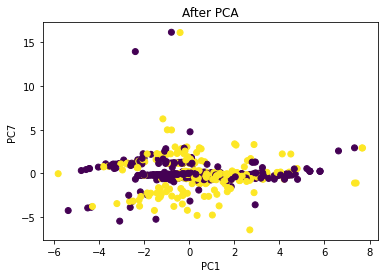

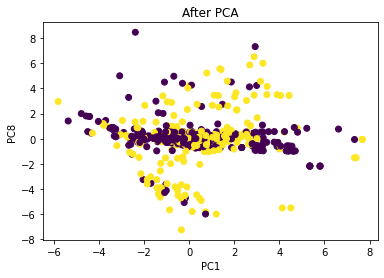

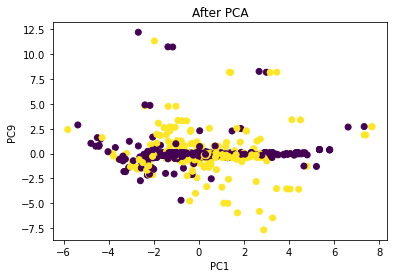

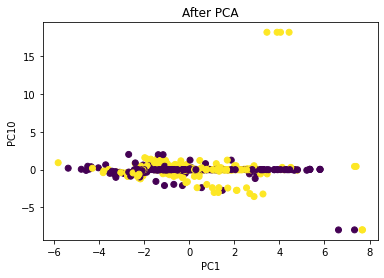

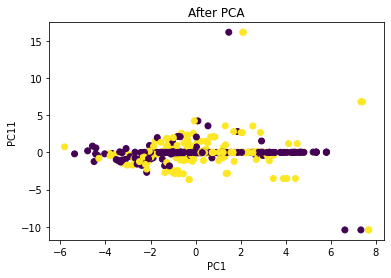

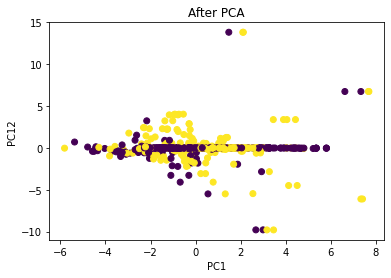

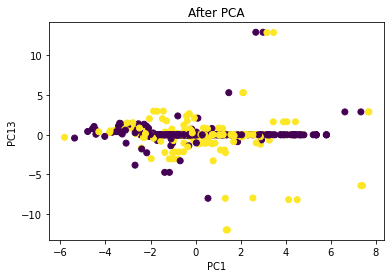

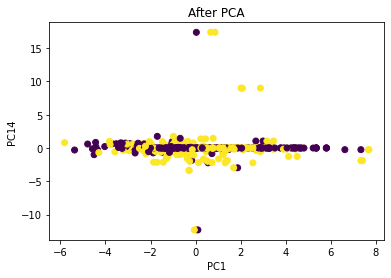

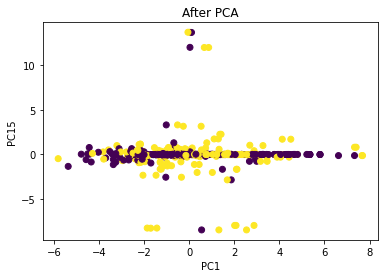

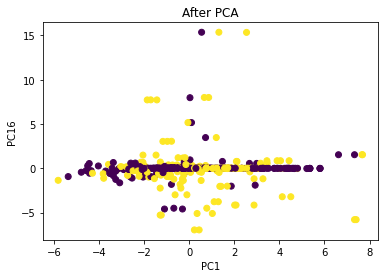

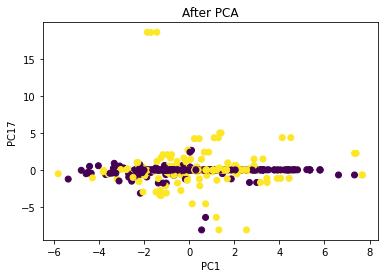

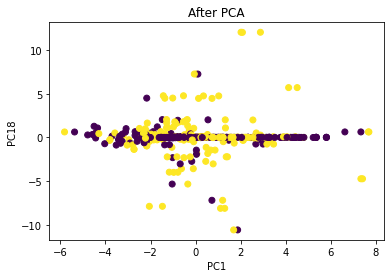

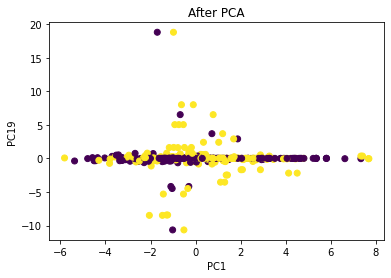

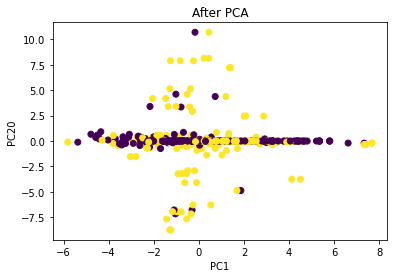

In [41]:
# fig, axes = plt.subplots(1,2)
# plt.scatter(X[:,0], X[:,1], c=df1.Survived)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Before PCA')
for i in range(0,20):
    plt.scatter(Principal_components[:,1], Principal_components[:,i],c=df1.Survived)
    plt.xlabel('PC1')
    plt.ylabel('PC'+ str(i+1))
    plt.title('After PCA')
    plt.show()

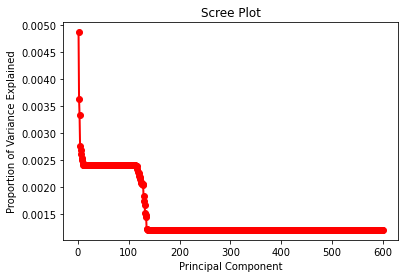

In [32]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)